# Model `BinaryMFPenalty`

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 4
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


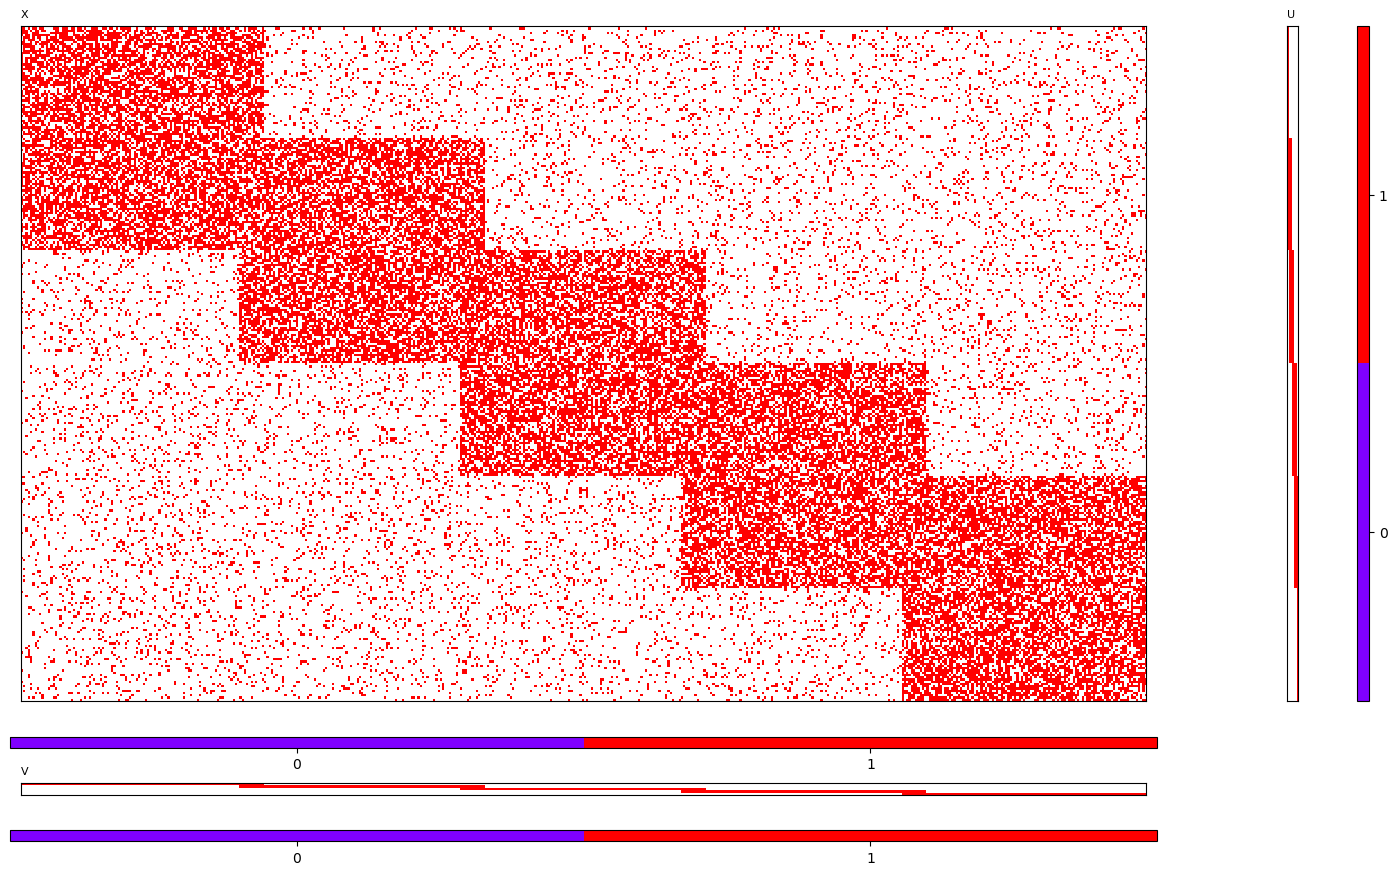

<Figure size 640x480 with 0 Axes>

In [2]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.5, 0.1, 0.5, 0.1])
data.generate(seed=1000)

data.add_noise(noise=[0.4, 0.1], seed=2000)
data.show_matrix()

In [3]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [4]:
from datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

split = NoSplit(X=data.X)

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1717098535
[I]   train_size   : 43279
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1717098535


In [5]:
X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

# 0.1 Init U, V with `NMFSklearn` / `WNMF`

Note that for multiplicative update, it's better to replace the zeros in init U, V with small values.

[I] k            : 5
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : cd
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.


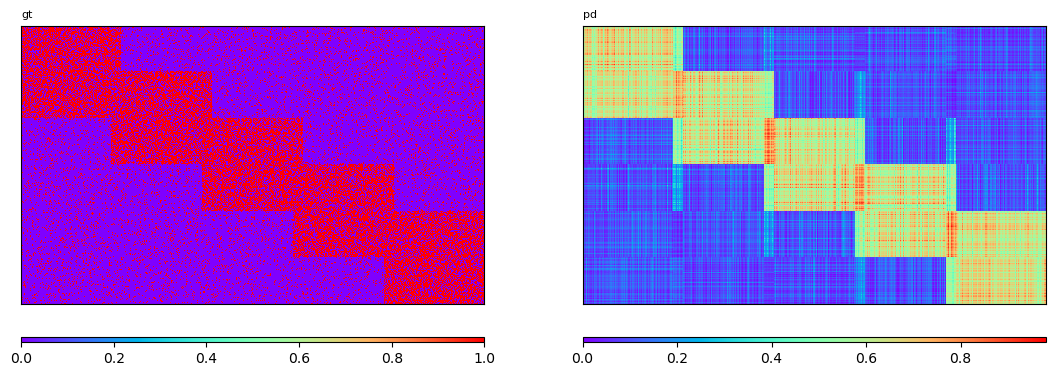

[I] model saved as: 24-05-31_03-48-57_NMFSklearn.pickle


<Figure size 640x480 with 0 Axes>

In [6]:
from models import NMFSklearn, WNMF

k = 5

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
# model_nmf = WNMF(k=k, W='full', beta_loss='frobenius', init_method='normal', max_iter=1000, seed=2024)

model_nmf.fit(X_train=X_train, task='reconstruction', verbose=False, display=False)

In [7]:
# init U and V
U, V = model_nmf.U, model_nmf.V

# replace zeros
import numpy as np
U[U == 0] = np.finfo(float).eps
V[V == 0] = np.finfo(float).eps

# params for BinaryMFPenalty and BinaryMFPenaltyExSigmoid
k = 5
reg = 1
reg_growth = 2
W = 'full'
task = 'reconstruction'

# params for BinaryMFThresholdExSigmoid
u, v = 0.1, 0.1

c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\IPython\core\interactiveshell.py:3505: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


# 1.1 Use U, V from `NMFSklearn` / `WNMF`

Since the regularizer `reg` grows at a rate of `reg_growth`， the total `error` might be constantly increasing. The `reg_error` is decreasing and is considered the convergence indicator.

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] reg          : 1
[I] beta_loss    : frobenius
[I] solver       : mu
[I] reg_growth   : 2
[I] tol          : 0.01
[I] min_diff     : 0.0
[I] max_iter     : 100
[I] init_method  : custom
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] verbose      : True
[I] display      : True
[I] Normalized U: [2.220446049250313e-16, 1.1180101669745737] -> [1.9860696394729758e-16, 1.0], V: [2.220446049250313e-16, 1.2039005684438493] -> [1.8443766100388516e-16, 1.0]
[I] iter: 1, error: 1.03e+04, rec_error: 1.03e+04, reg: 1.00e+00, reg_error: 2.35e+01
[I] iter: 2, error: 1.03e+04, rec_error: 1.03e+04, reg: 2.00e+00, reg_error: 2.34e+01
[I] iter: 3, error: 1.04e+04, rec_error: 1.03e+04, reg: 4.00e+00, reg_error: 2.31e+01
[I] iter: 4, error: 1.05e+04, rec_error: 1.03e+04, reg: 8.00e+00, reg_error: 2.26e+01
[I] iter: 5, error: 1.06e+04, rec_

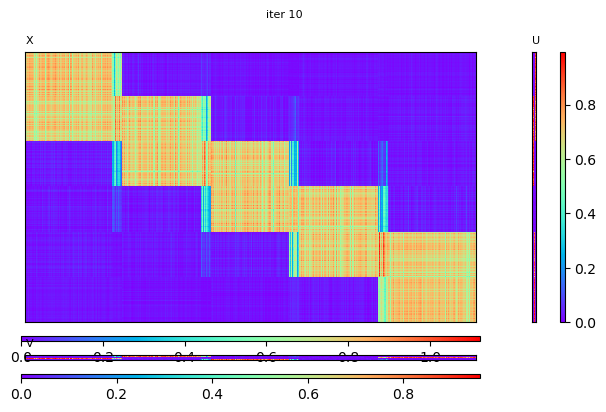

[I] iter: 11, error: 1.81e+04, rec_error: 1.16e+04, reg: 1.02e+03, reg_error: 6.39e+00
[I] iter: 12, error: 2.12e+04, rec_error: 1.21e+04, reg: 2.05e+03, reg_error: 4.44e+00
[I] iter: 13, error: 2.49e+04, rec_error: 1.26e+04, reg: 4.10e+03, reg_error: 3.01e+00
[I] iter: 14, error: 2.94e+04, rec_error: 1.30e+04, reg: 8.19e+03, reg_error: 2.00e+00
[I] iter: 15, error: 3.50e+04, rec_error: 1.34e+04, reg: 1.64e+04, reg_error: 1.32e+00
[I] iter: 16, error: 4.25e+04, rec_error: 1.38e+04, reg: 3.28e+04, reg_error: 8.76e-01
[I] iter: 17, error: 5.30e+04, rec_error: 1.40e+04, reg: 6.55e+04, reg_error: 5.95e-01
[I] iter: 18, error: 6.88e+04, rec_error: 1.42e+04, reg: 1.31e+05, reg_error: 4.16e-01
[I] iter: 19, error: 9.16e+04, rec_error: 1.44e+04, reg: 2.62e+05, reg_error: 2.94e-01
[I] iter: 20, error: 1.23e+05, rec_error: 1.45e+04, reg: 5.24e+05, reg_error: 2.07e-01


<Figure size 640x480 with 0 Axes>

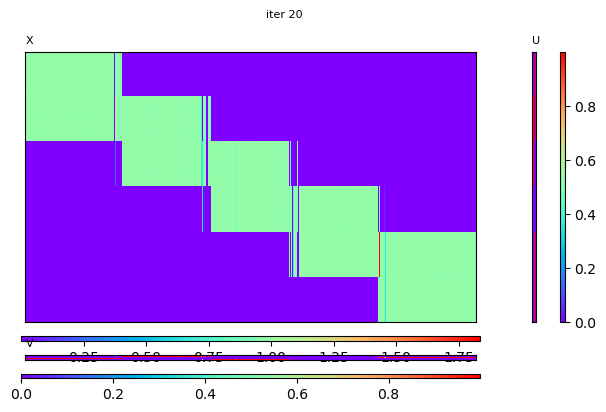

[I] iter: 21, error: 1.67e+05, rec_error: 1.46e+04, reg: 1.05e+06, reg_error: 1.46e-01
[I] iter: 22, error: 2.26e+05, rec_error: 1.46e+04, reg: 2.10e+06, reg_error: 1.01e-01
[I] iter: 23, error: 3.02e+05, rec_error: 1.46e+04, reg: 4.19e+06, reg_error: 6.85e-02
[I] iter: 24, error: 3.91e+05, rec_error: 1.47e+04, reg: 8.39e+06, reg_error: 4.49e-02
[I] iter: 25, error: 4.77e+05, rec_error: 1.47e+04, reg: 1.68e+07, reg_error: 2.76e-02
[I] iter: 26, error: 5.47e+05, rec_error: 1.47e+04, reg: 3.36e+07, reg_error: 1.59e-02
[I] iter: 27, error: 5.90e+05, rec_error: 1.47e+04, reg: 6.71e+07, reg_error: 8.57e-03
[W] Stopped in advance: Error lower than tolerance


\
                                                                      
                 time iter          error     rec_error         reg   
0   31/05/24 03:48:58    0   10590.355960  10569.940054         1.0   
1   31/05/24 03:48:58    1   10304.678918  10281.209377         1.0   
2   31/05/24 03:48:58    2   10327.868818  10281.165143         2.0   
3   31/05/24 03:48:58    3   10374.036567  10281.664875         4.0   
4   31/05/24 03:48:58    4   10464.478822  10283.683255         8.0   
5   31/05/24 03:48:58    5   10637.993940  10290.636663        16.0   
6   31/05/24 03:48:58    6   10959.189123  10311.957173        32.0   
7   31/05/24 03:48:58    7   11521.149076  10368.770842        64.0   
8   31/05/24 03:48:58    8   12432.044790  10497.153142       128.0   
9   31/05/24 03:48:58    9   13788.700656  10737.708405       256.0   
10  31/05/24 03:48:58   10   15664.266744  11105.898231       512.0   
11  31/05/24 03:48:59   11   18113.652239  11571.849379      1024.0   
12  31/05/24 03:48:59   12   21175.631352  12080.977066      2048.0   
13  31/05/24 03:48:59   13   24903.242001  12583.392744      4096.0   
14  31/05/24 03:48:59   14   29409.849859  13045.723640      8192.0   
15  31/05/24 03:48:59   15   35016.418112  13448.615050     16384.0   
16  31/05/24 03:48:59   16   42473.423160  13778.897054     32768.0   
17  31/05/24 03:48:59   17   53045.038089  14035.658977     65536.0   
18  31/05/24 03:48:59   18   68810.216318  14229.205274    131072.0   
19  31/05/24 03:49:00   19   91555.933194  14371.818929    262144.0   
20  31/05/24 03:49:00   20  123067.780167  14476.967644    524288.0   
21  31/05/24 03:49:00   21  167249.986774  14553.828636   1048576.0   
22  31/05/24 03:49:00   22  225882.465424  14609.117379   2097152.0   
23  31/05/24 03:49:00   23  302058.462296  14649.155536   4194304.0   
24  31/05/24 03:49:00   24  391246.741579  14678.079404   8388608.0   
25  31/05/24 03:49:01   25  477445.761879  14699.149401  16777216.0   
26  31/05/24 03:49:01   26  546677.951219  14714.569172  33554432.0   
27  31/05/24 03:49:01   27  590022.990067  14725.746523  67108864.0   

                  train                 val                test            
                      0                   0                   0            
    reg_error      RMSE       MAE      RMSE       MAE      RMSE       MAE  
0   20.415906  0.375410  0.274662  0.375410  0.274662  0.375410  0.274662  
1   23.469541  0.370247  0.276110  0.370247  0.276110  0.370247  0.276110  
2   23.351838  0.370246  0.275814  0.370246  0.275814  0.370246  0.275814  
3   23.092923  0.370255  0.275198  0.370255  0.275198  0.370255  0.275198  
4   22.599446  0.370291  0.274000  0.370291  0.274000  0.370291  0.274000  
5   21.709830  0.370417  0.271769  0.370417  0.271769  0.370417  0.271769  
6   20.225998  0.370800  0.267855  0.370800  0.267855  0.370800  0.267855  
7   18.005910  0.371820  0.261546  0.371820  0.261546  0.371820  0.261546  
8   15.116341  0.374115  0.252506  0.374115  0.252506  0.374115  0.252506  
9   11.917938  0.378377  0.241386  0.378377  0.241386  0.378377  0.241386  
10   8.903064  0.384810  0.230001  0.384810  0.230001  0.384810  0.230001  
11   6.388479  0.392799  0.220353  0.392799  0.220353  0.392799  0.220353  
12   4.440749  0.401347  0.213277  0.401347  0.213277  0.401347  0.213277  
13   3.007776  0.409608  0.208390  0.409608  0.208390  0.409608  0.208390  
14   1.997574  0.417065  0.204999  0.417065  0.204999  0.417065  0.204999  
15   1.316394  0.423456  0.202610  0.423456  0.202610  0.423456  0.202610  
16   0.875687  0.428624  0.200905  0.428624  0.200905  0.428624  0.200905  
17   0.595236  0.432599  0.199685  0.432599  0.199685  0.432599  0.199685  
18   0.416420  0.435572  0.198822  0.435572  0.198822  0.435572  0.198822  
19   0.294434  0.437749  0.198194  0.437749  0.198194  0.437749  0.198194  
20   0.207121  0.439348  0.197753  0.439348  0.197753  0.439348  0.197753  
21   0.145622  0.440512  0.197430  0.440512

<Figure size 640x480 with 0 Axes>

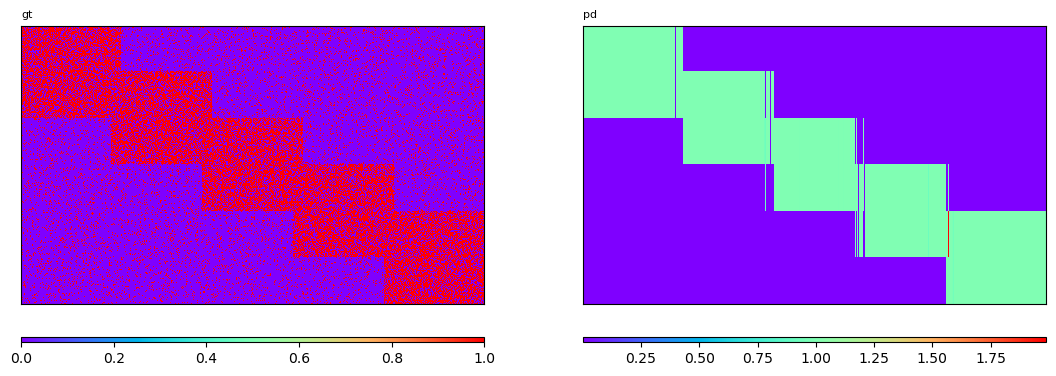

[I] model saved as: 24-05-31_03-49-01_BinaryMFPenalty.pickle


<Figure size 640x480 with 0 Axes>

In [8]:
from models import BinaryMFPenalty

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

model = BinaryMFPenalty(k=k, U=U, V=V, W=W, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=100, seed=2024)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=True, display=True)

# 1.2 Thresholding with `BinaryMFThresholdExSigmoid`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] u            : 0.1
[I] v            : 0.1
[I] link_lamda   : 10
[I] lamda        : 20
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] init_method  : custom
[I] seed         : 1717098541
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Normalized U: [1.4894527691336814e-08, 0.9999720827434821] -> [1.4894943517295805e-08, 1.0], V: [9.259346651410157e-22, 0.9999182575397602] -> [9.260689788103934e-22, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [3602.787, 6363.972]
[I] iter: 2, start: [0.127, 0.149], direction: [-357.152, -388.171]
[I] iter: 3, start: [0.095, 0.113], direction: [1204.066, 1737.141]
[I] iter: 4, start: [0.701, 0.988], direction: [-0.466, -128.764]
[W] Stopped in advance: Difference lower than threshold


train  \
                                                                    0   
                time iter         u         v             F    Recall   
0  31/05/24 03:49:02    0  0.100000  0.100000  14485.621978  0.732434   
1  31/05/24 03:49:02    1  0.127487  0.148553  14319.412623  0.732434   
2  31/05/24 03:49:02    2  0.094789  0.113015  14128.050144  0.732434   
3  31/05/24 03:49:03    3  0.701084  0.987735  11492.106095  0.723584   
4  31/05/24 03:49:03    4  0.701084  0.987489  11491.977924  0.723584   

                                      val                                \
                                        0                                 
  Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0  0.639738  0.803793  0.682955  0.732434  0.639738  0.803793  0.682955   
1  0.639738  0.803793  0.682955  0.732434  0.639738  0.803793  0.682955   
2  0.639738  0.803793  0.682955  0.732434  0.639738  0.803793  0.682955   
3  0.639755  0.802687  0.679092  0.723584  0.639755  0.802687  0.679092   
4  0.639755  0.802687  0.679092  0.723584  0.639755  0.802687  0.679092   

       test                                
          0                                
     Recall Precision  Accuracy        F1  
0  0.732434  0.639738  0.803793  0.682955  
1  0.732434  0.639738  0.803793  0.682955  
2  0.732434  0.639738  0.803793  0.682955  
3  0.723584  0.639755  0.802687  0.679092  
4  0.723584  0.639755  0.802687  0.679092

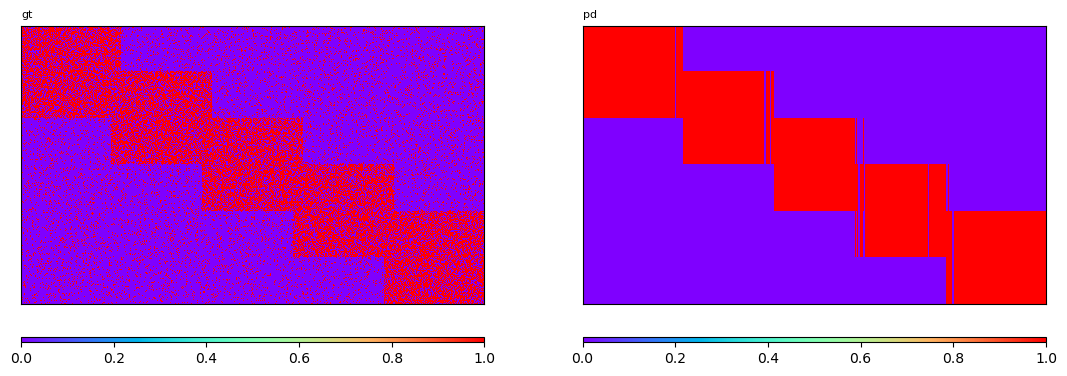

[I] model saved as: 24-05-31_03-49-04_BinaryMFThresholdExSigmoid.pickle


<Figure size 640x480 with 0 Axes>

In [9]:
from models import BinaryMFThresholdExSigmoid

model_bmfts_1 = BinaryMFThresholdExSigmoid(k=k, U=model.U, V=model.V, W=W, u=u, v=v, init_method='custom', lamda=20)
model_bmfts_1.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)

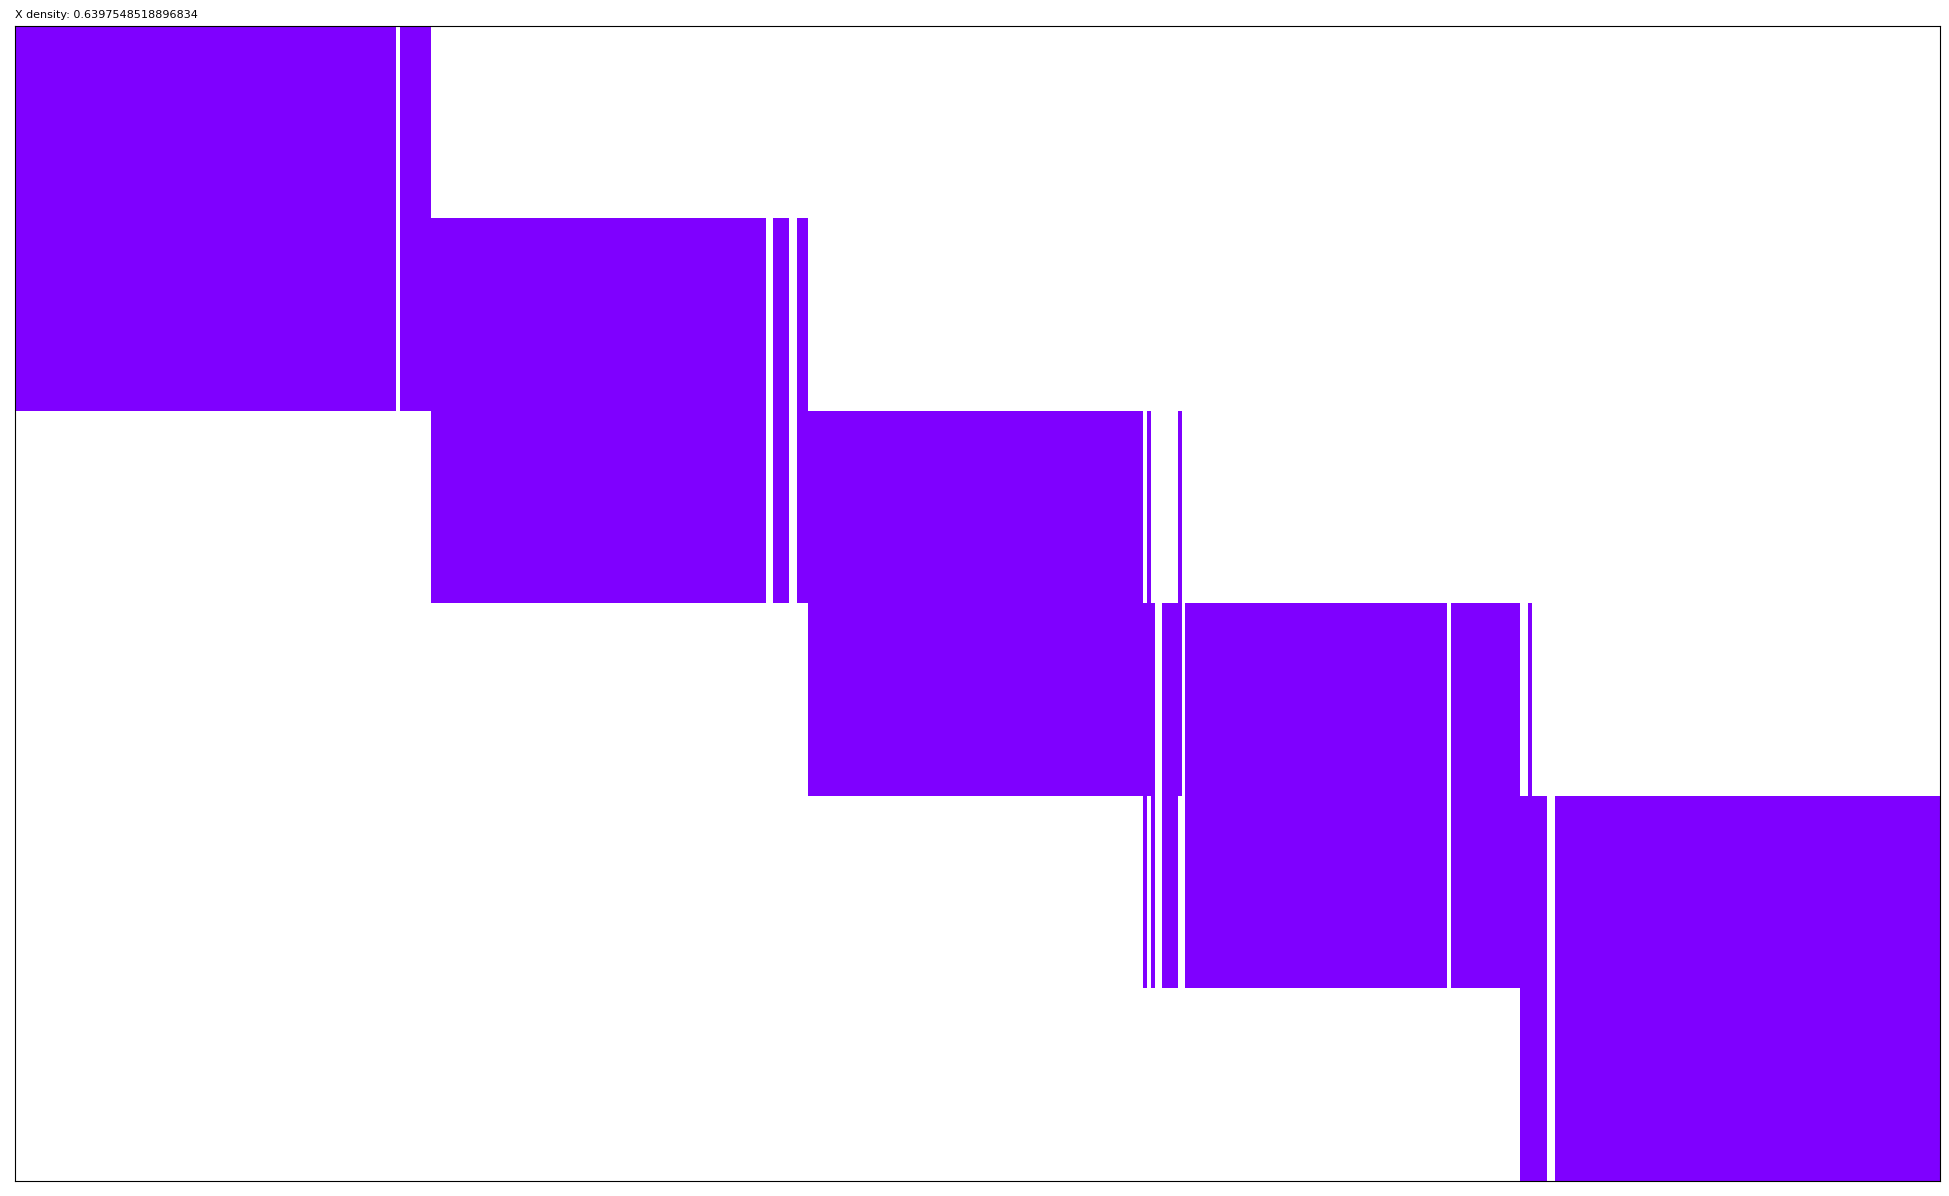

<Figure size 640x480 with 0 Axes>

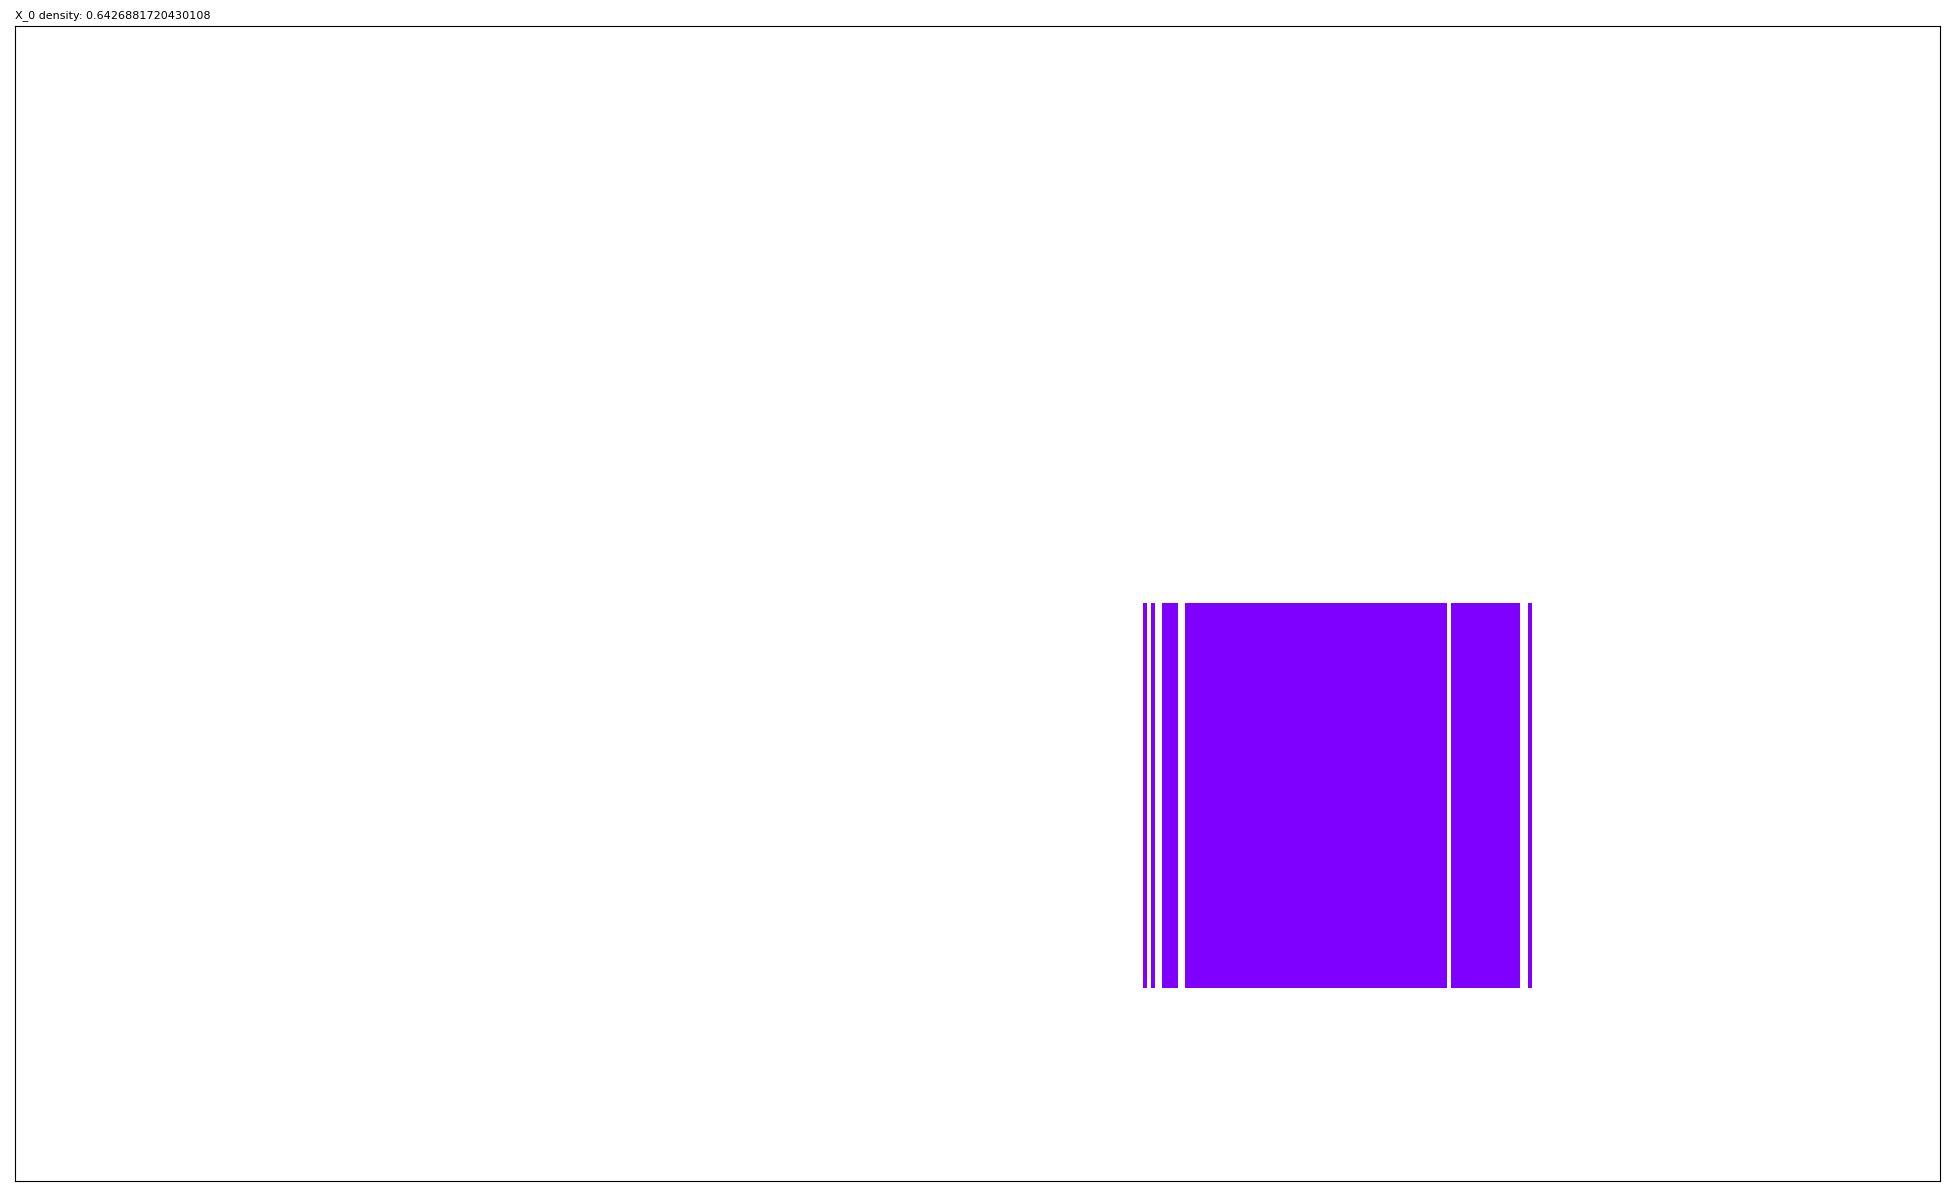

<Figure size 640x480 with 0 Axes>

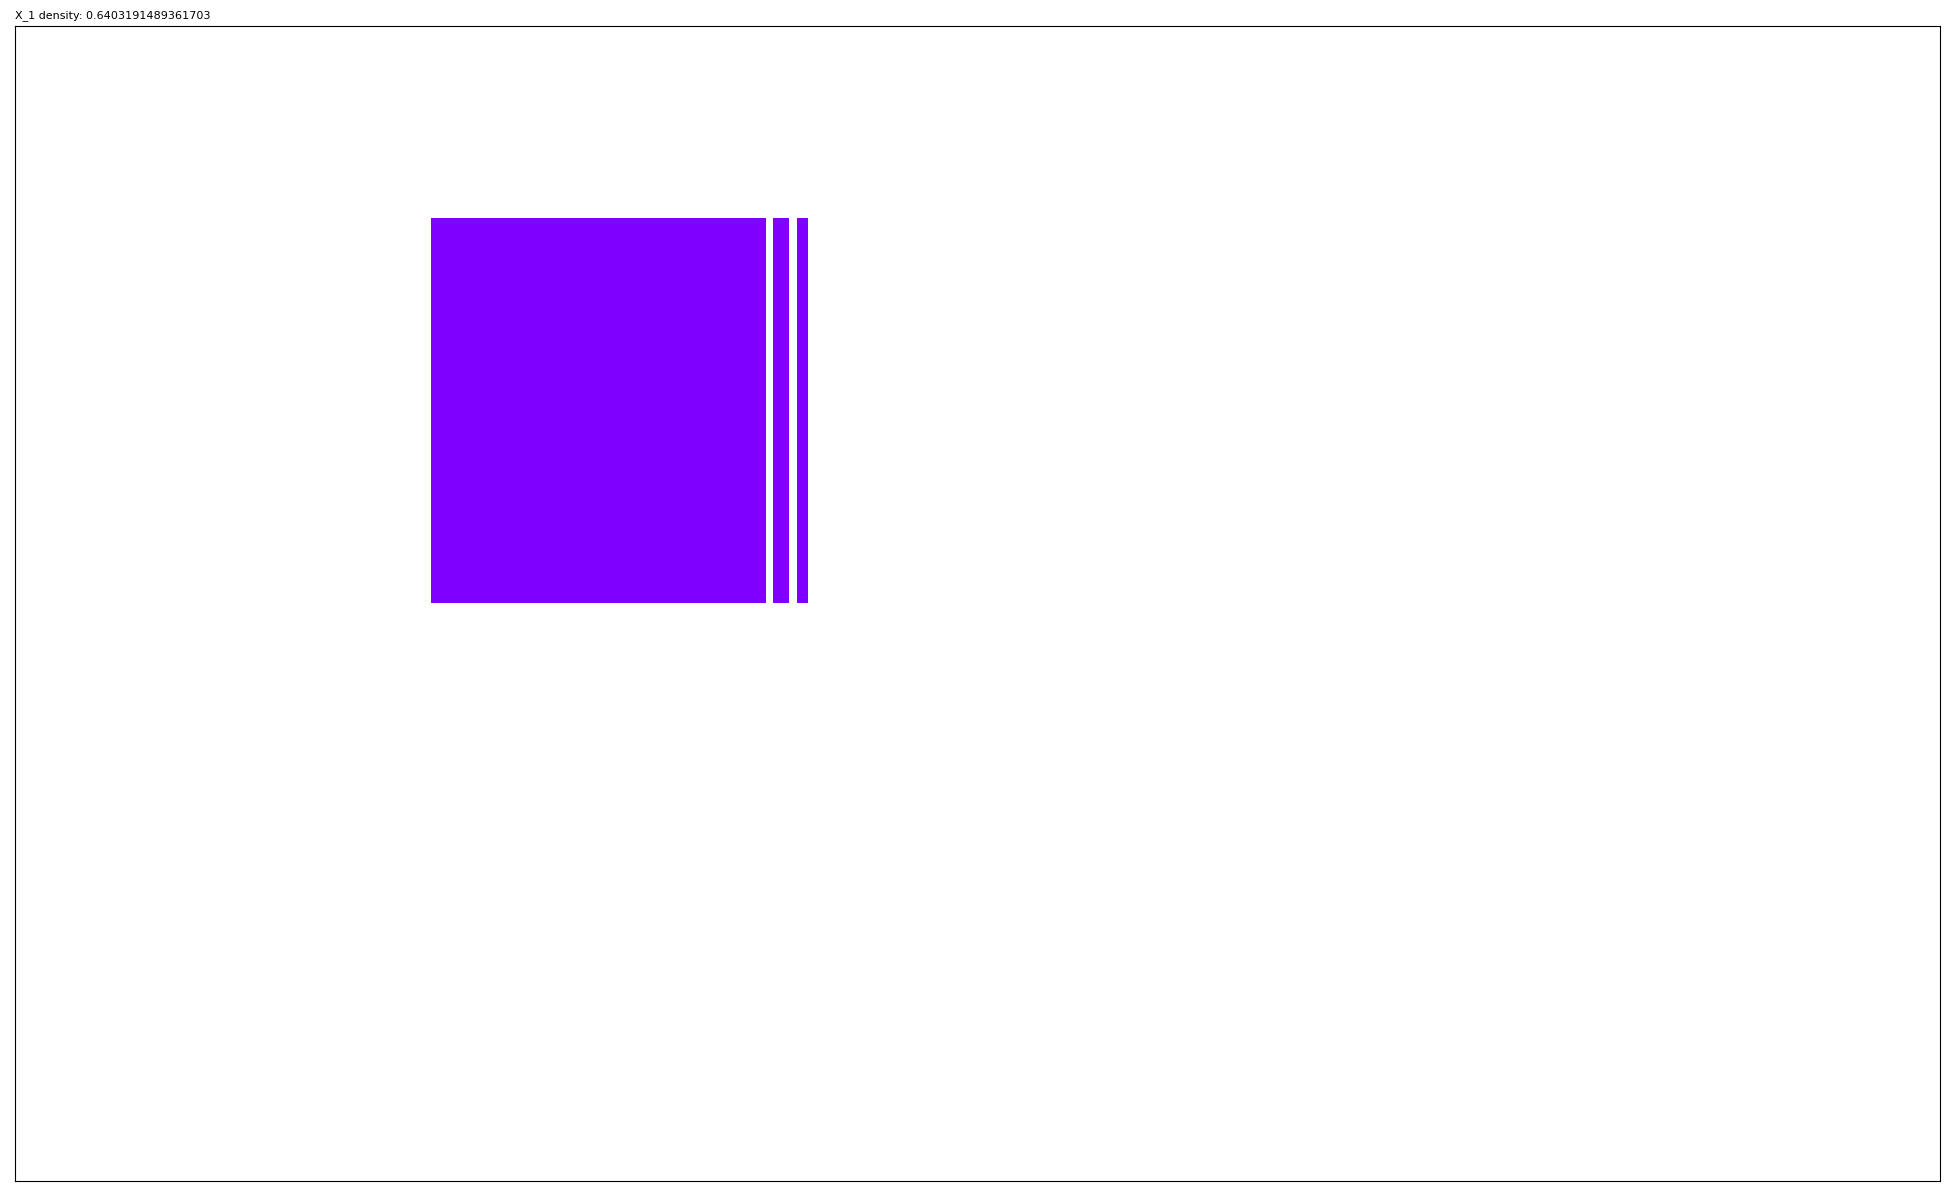

<Figure size 640x480 with 0 Axes>

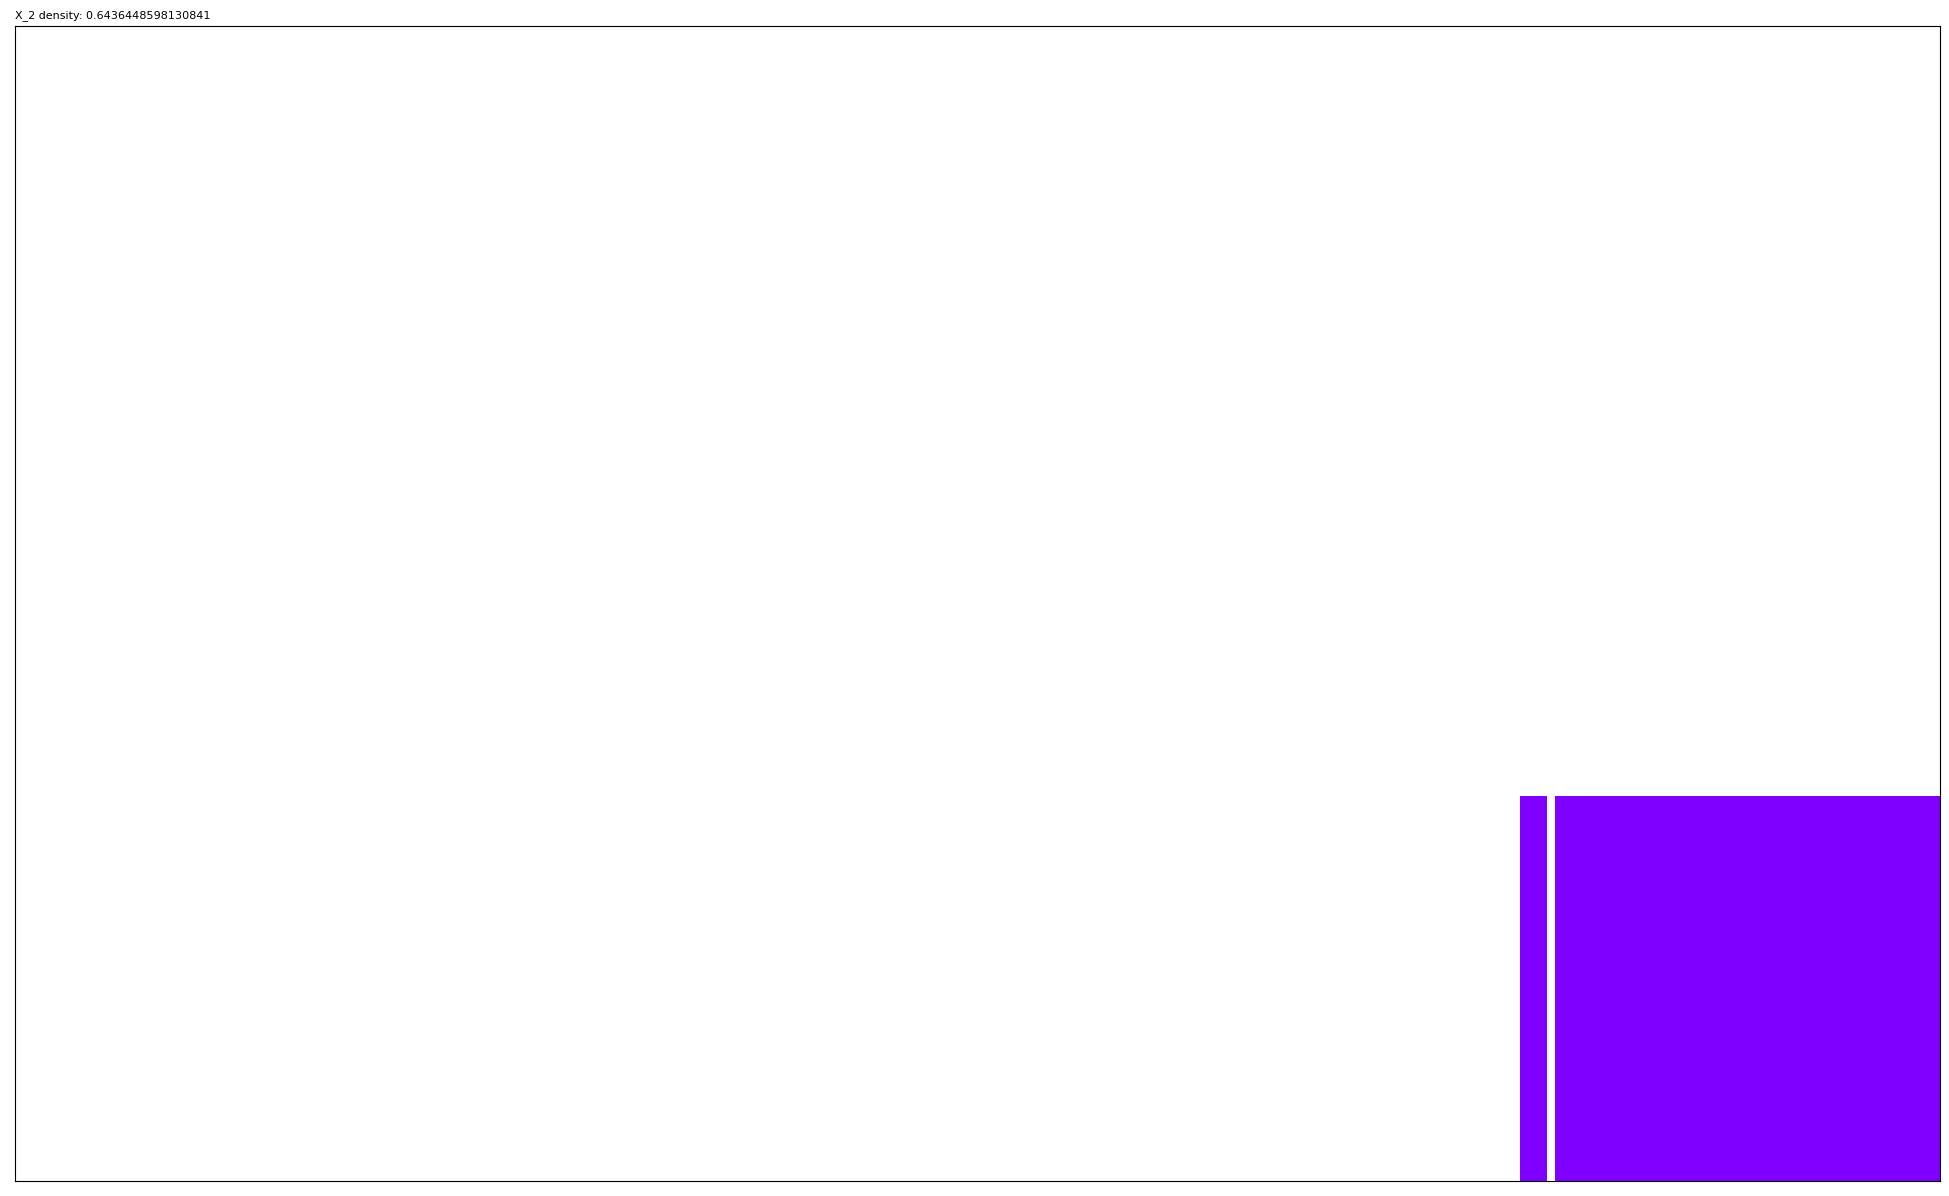

<Figure size 640x480 with 0 Axes>

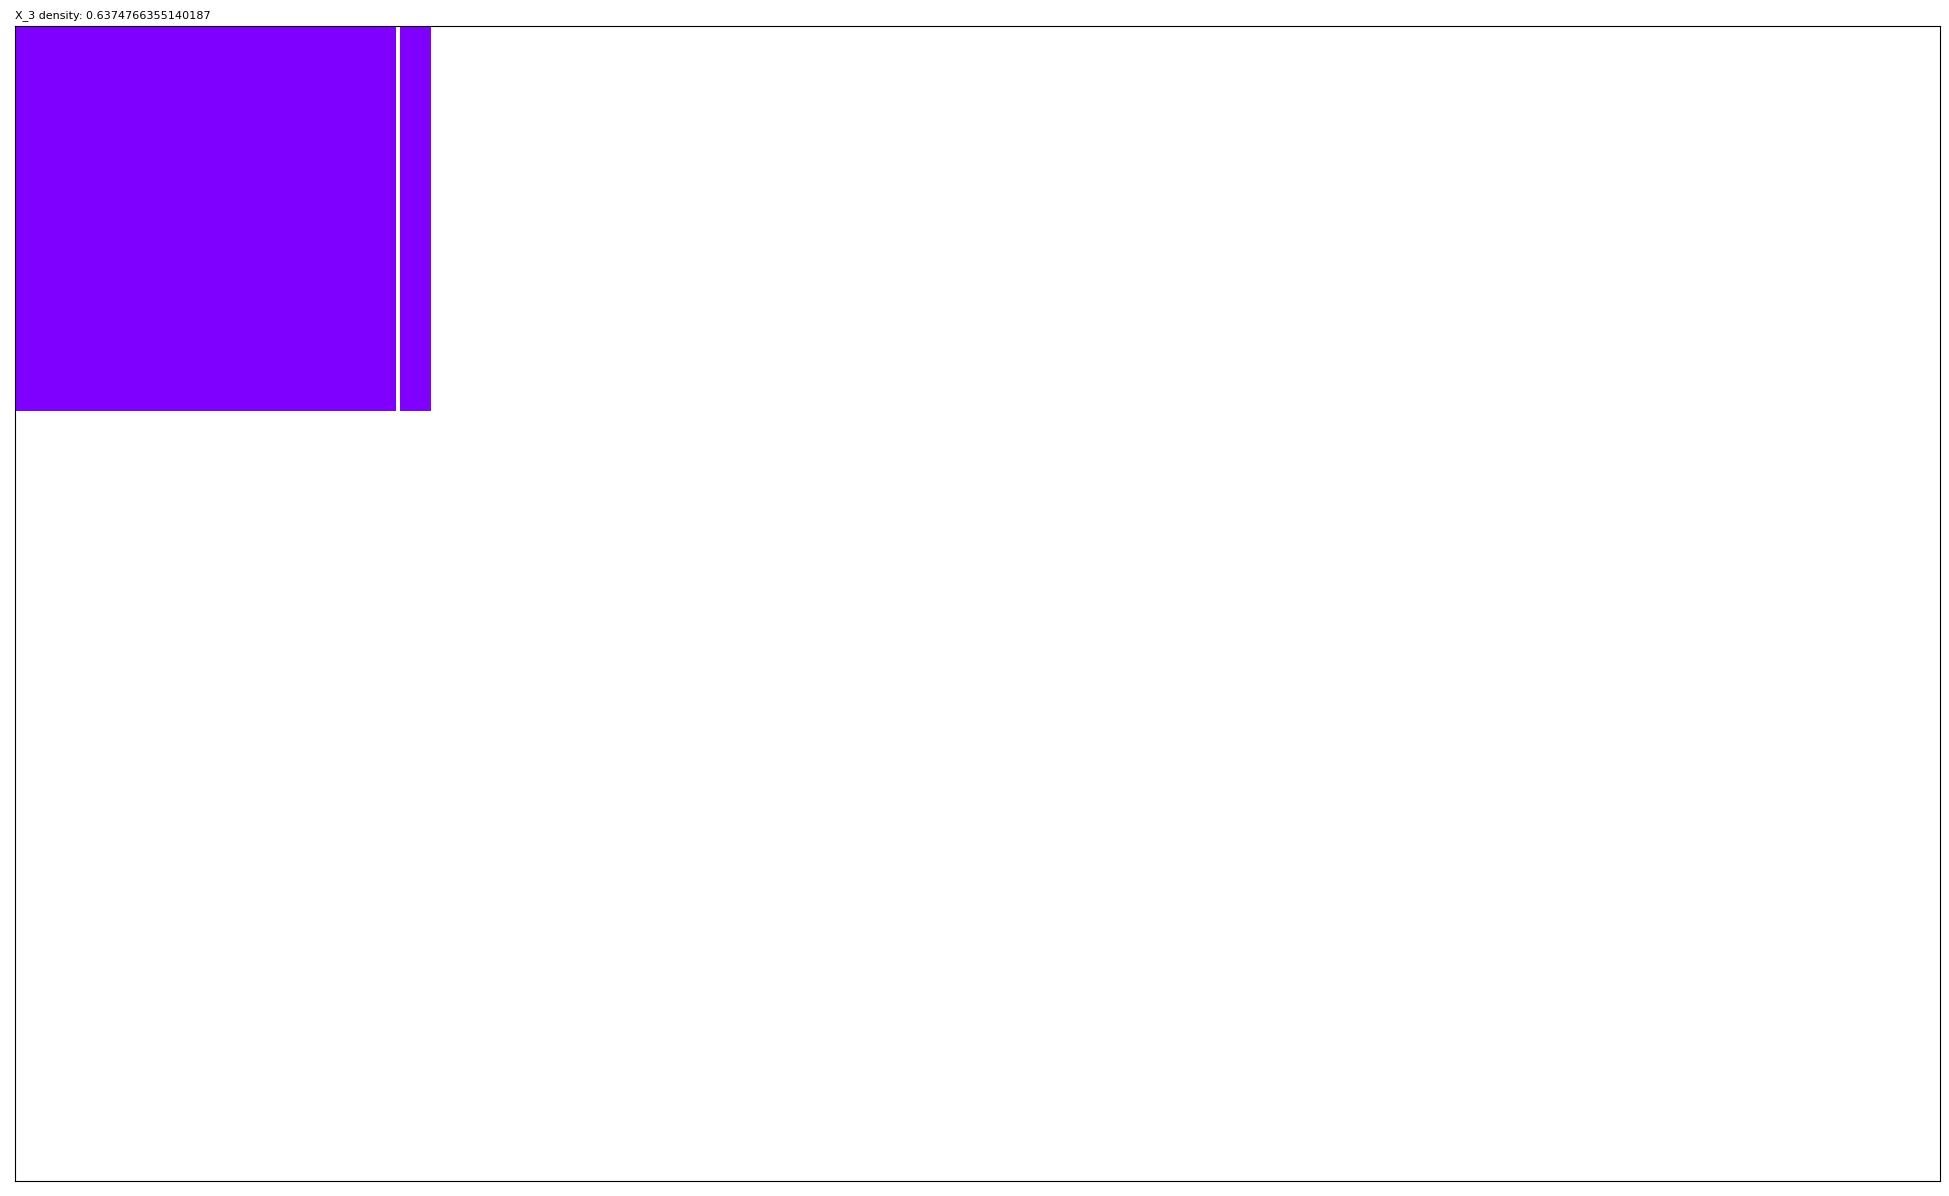

<Figure size 640x480 with 0 Axes>

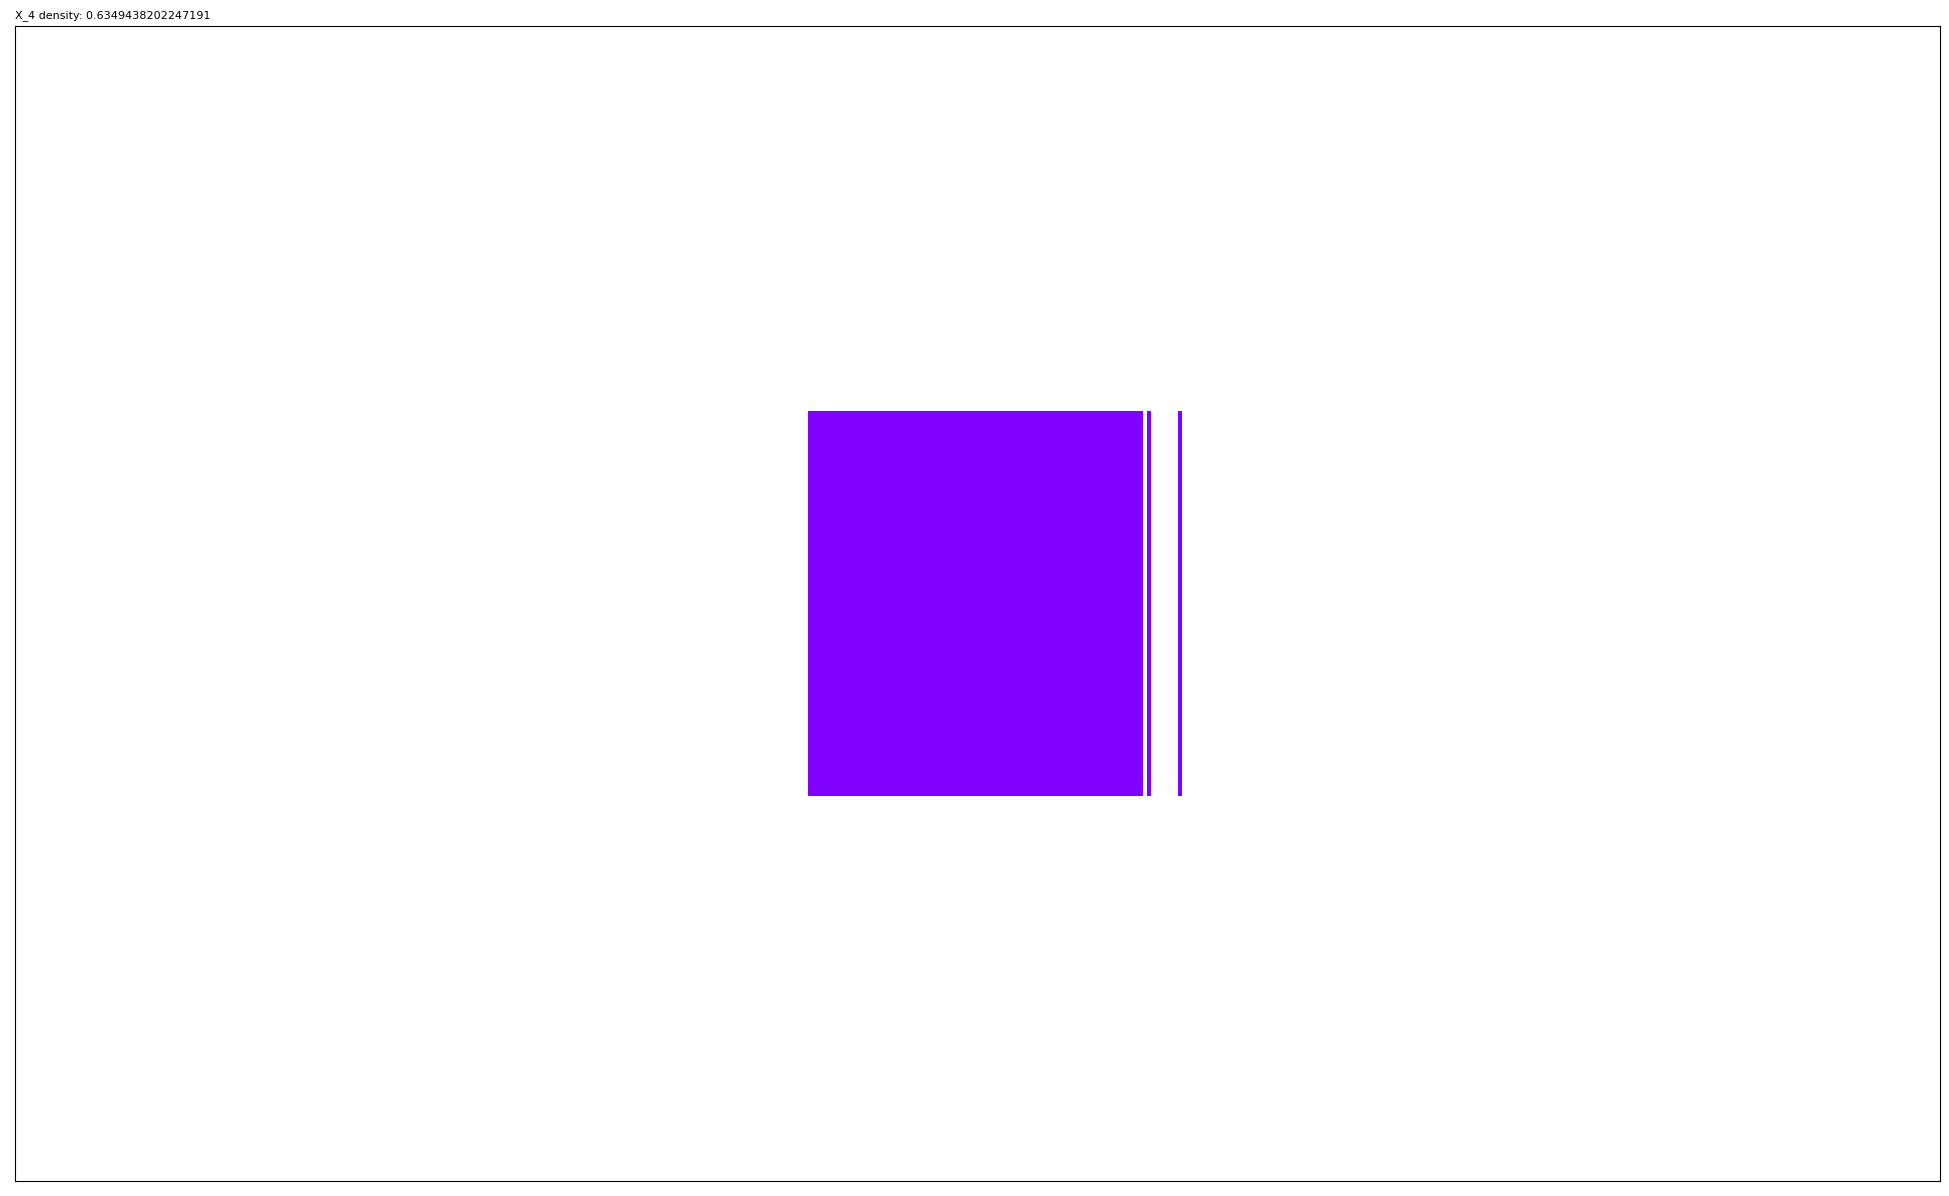

<Figure size 640x480 with 0 Axes>

In [10]:
# check pattern density

from utils import binarize, matmul, show_matrix, to_sparse, multiply

U = binarize(model_bmfts_1.U, model_bmfts_1.u)
V = binarize(model_bmfts_1.V, model_bmfts_1.v)

U, V = to_sparse(U), to_sparse(V)

X = matmul(U, V.T, sparse=True, boolean=True)
density = multiply(X, X_train).sum() / X.sum()
show_matrix([(X, [0, 0], f"X density: {density}")])

for i in range(k):
    X = matmul(U[:, i], V[:, i].T, sparse=True, boolean=True)
    density = multiply(X, X_train).sum() / X.sum()
    show_matrix([(X, [0, 0], f"X_{i} density: {density}")])

# 2.1 Init U, V randomly

If `BinaryMFPenalty` is initialized with `init_method` == `normal` or `uniform`, then `reg` and `reg_growth` should not be set too large. It's hard to tweak comparing to `NMFSklearn` init.

[I] k            : 5
[I] U            : None
[I] V            : None
[I] W            : full
[I] reg          : 1
[I] beta_loss    : frobenius
[I] solver       : mu
[I] reg_growth   : 1.1
[I] tol          : 0.01
[I] min_diff     : 0.0
[I] max_iter     : 100
[I] init_method  : normal
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] display      : True
[I] Normalized U: [0.0008838916076722335, 0.8469211700512891] -> [0.0012578774371456367, 1.0], V: [0.00010647605073931424, 1.0574794948005815] -> [0.00012067988668126909, 1.0]
[W] Stopped in advance: Error lower than tolerance


\
                                                                        
                  time iter         error     rec_error           reg   
0    31/05/24 03:49:08    0  17662.997951  17606.069209      1.000000   
1    31/05/24 03:49:09    1  15337.826017  15282.356335      1.000000   
2    31/05/24 03:49:09    2  15189.479012  15127.767698      1.100000   
3    31/05/24 03:49:09    3  15033.877908  14965.797577      1.210000   
4    31/05/24 03:49:09    4  14756.514305  14682.254039      1.331000   
5    31/05/24 03:49:09    5  14288.535368  14208.677777      1.464100   
6    31/05/24 03:49:09    6  13716.787623  13631.824137      1.610510   
7    31/05/24 03:49:09    7  13234.816846  13144.605785      1.771561   
8    31/05/24 03:49:09    8  12899.645616  12803.580059      1.948717   
9    31/05/24 03:49:09    9  12617.058003  12514.670314      2.143589   
10   31/05/24 03:49:09   10  12309.072557  12200.306005      2.357948   
11   31/05/24 03:49:09   11  11999.789577  11884.634162      2.593742   
12   31/05/24 03:49:09   12  11755.688163  11633.458960      2.853117   
13   31/05/24 03:49:09   13  11596.033000  11465.364222      3.138428   
14   31/05/24 03:49:10   14  11495.746417  11355.157439      3.452271   
15   31/05/24 03:49:10   15  11426.518248  11274.708687      3.797498   
16   31/05/24 03:49:10   16  11371.036670  11206.868576      4.177248   
17   31/05/24 03:49:10   17  11320.910592  11143.293440      4.594973   
18   31/05/24 03:49:10   18  11273.174244  11080.953448      5.054470   
19   31/05/24 03:49:10   19  11227.980971  11019.868044      5.559917   
20   31/05/24 03:49:10   20  11186.956211  10961.518514      6.115909   
21   31/05/24 03:49:10   21  11151.969601  10907.654501      6.727500   
22   31/05/24 03:49:10   22  11124.448544  10859.598075      7.400250   
23   31/05/24 03:49:10   23  11105.209240  10818.057023      8.140275   
24   31/05/24 03:49:10   24  11094.504607  10783.173578      8.954302   
25   31/05/24 03:49:10   25  11092.044087  10754.537674      9.849733   
26   31/05/24 03:49:10   26  11097.132923  10731.307654     10.834706   
27   31/05/24 03:49:11   27  11108.966769  10712.508686     11.918177   
28   31/05/24 03:49:11   28  11126.848164  10697.267256     13.109994   
29   31/05/24 03:49:11   29  11150.259391  10684.895572     14.420994   
30   31/05/24 03:49:11   30  11178.860967  10674.895533     15.863093   
31   31/05/24 03:49:11   31  11212.464897  10666.936620     17.449402   
32   31/05/24 03:49:11   32  11250.997905  10660.824339     19.194342   
33   31/05/24 03:49:11   33  11294.462690  10656.466015     21.113777   
34   31/05/24 03:49:11   34  11342.906772  10653.842534     23.225154   
35   31/05/24 03:49:11   35  11396.403753  10652.991419     25.547670   
36   31/05/24 03:49:11   36  11455.042867  10653.999016     28.102437   
37   31/05/24 03:49:11   37  11518.913323  10656.991036     30.912681   
38   31/05/24 03:49:11   38  11588.074819  10662.112443     34.003949   
39   31/05/24 03:49:11   39  11662.534444  10669.510663     37.404343   
40   31/05/24 03:49:12   40  11742.249102  10679.339375     41.144778   
41   31/05/24 03:49:12   41  11827.139210  10691.772745     45.259256   
42   31/05/24 03:49:12   42  11917.099156  10707.015299     49.785181   
43   31/05/24 03:49:12   43  12012.003385  10725.305543     54.763699   
44   31/05/24 03:49:12   44  12111.707617  10746.919287     60.240069   
45   31/05/24 03:49:12   45  12216.041225  10772.176215     66.264076   
46   31/05/24 03:49:12   46  12324.796580  10801.441841     72.890484   
47   31/05/24 03:49:12   47  12437.745953  10835.121705     80.179532   
48   31/05/24 03:49:12   48  12554.698868  10873.658863     88.197485   
49   31/05/24 03:49:12   49  12675.545538  10917.528340     97.017234   
50   31/05/24 03:49:12   50  12800.235083  10967.217093    106.718957   
51   31/05/24 03:49:12   51  12928.707103  11023.212095    117.390853   
52   31/05/24 03:49:12   52  13060.822114  11086.018320 

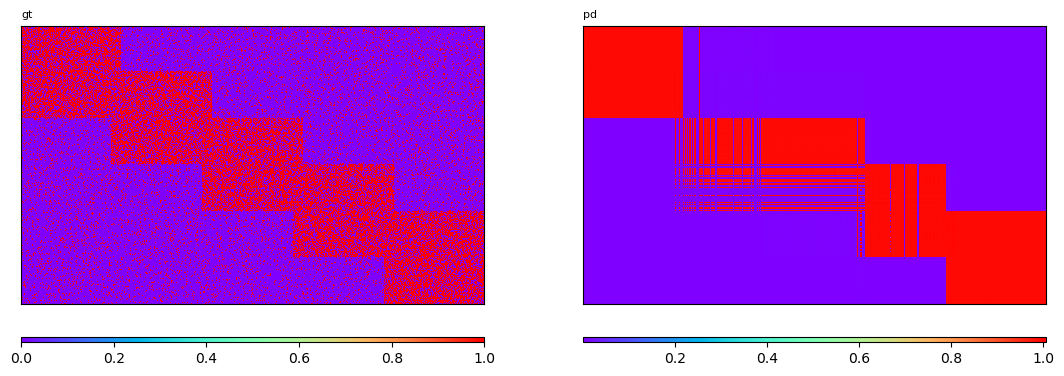

[I] model saved as: 24-05-31_03-49-17_BinaryMFPenalty.pickle


<Figure size 640x480 with 0 Axes>

In [11]:
init_method = 'normal'
# init_method = 'uniform'

reg = 1
reg_growth = 1.1

model = BinaryMFPenalty(k=k, U=None, V=None, reg=reg, reg_growth=reg_growth, init_method=init_method, max_iter=100, seed=2024)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=True)

# 2.2 Thresholding with `BinaryMFThresholdExSigmoid`

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : full
[I] u            : 0.1
[I] v            : 0.1
[I] link_lamda   : 10
[I] lamda        : 100
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] init_method  : custom
[I] seed         : 1717098557
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Normalized U: [7.594681621393669e-44, 1.0000036194745923] -> [7.594654132735998e-44, 1.0], V: [4.646783124222762e-74, 0.9990827336762135] -> [4.651049375184888e-74, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [-0.544, -0.424]
[I] iter: 2, start: [0.011, 0.030], direction: [45651.821, 21052.244]
[I] iter: 3, start: [0.016, 0.033], direction: [-9562.552, -3379.136]
[I] iter: 4, start: [0.012, 0.031], direction: [20786.187, 9427.375]
[I] iter: 5, start: [0.014, 0.032], direction: [-5356.038, -1538.292]
[I] iter: 6, start: [0.013, 0.032], direction: [3052.187, 1870.843]
[W] Stopped in advance: Difference l

train  \
                                                                    0   
                time iter         u         v             F    Recall   
0  31/05/24 03:49:17    0  0.100000  0.100000  16031.305390  0.621317   
1  31/05/24 03:49:17    1  0.010757  0.030367  15496.209439  0.621317   
2  31/05/24 03:49:18    2  0.016199  0.032876  15110.946182  0.621317   
3  31/05/24 03:49:18    3  0.011639  0.031265  15078.573724  0.621317   
4  31/05/24 03:49:19    4  0.014117  0.032389  14928.825667  0.621317   
5  31/05/24 03:49:19    5  0.012840  0.032022  14907.248750  0.621317   
6  31/05/24 03:49:19    6  0.013568  0.032468  14906.384965  0.621317   

                                      val                                \
                                        0                                 
  Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0  0.625465  0.783393  0.623384  0.621317  0.625465  0.783393  0.623384   
1  0.625465  0.783393  0.623384  0.621317  0.625465  0.783393  0.623384   
2  0.625465  0.783393  0.623384  0.621317  0.625465  0.783393  0.623384   
3  0.625465  0.783393  0.623384  0.621317  0.625465  0.783393  0.623384   
4  0.625465  0.783393  0.623384  0.621317  0.625465  0.783393  0.623384   
5  0.625465  0.783393  0.623384  0.621317  0.625465  0.783393  0.623384   
6  0.625465  0.783393  0.623384  0.621317  0.625465  0.783393  0.623384   

       test                                
          0                                
     Recall Precision  Accuracy        F1  
0  0.621317  0.625465  0.783393  0.623384  
1  0.621317  0.625465  0.783393  0.623384  
2  0.621317  0.625465  0.783393  0.623384  
3  0.621317  0.625465  0.783393  0.623384  
4  0.621317  0.625465  0.783393  0.623384  
5  0.621317  0.625465  0.783393  0.623384  
6  0.621317  0.625465  0.783393  0.623384

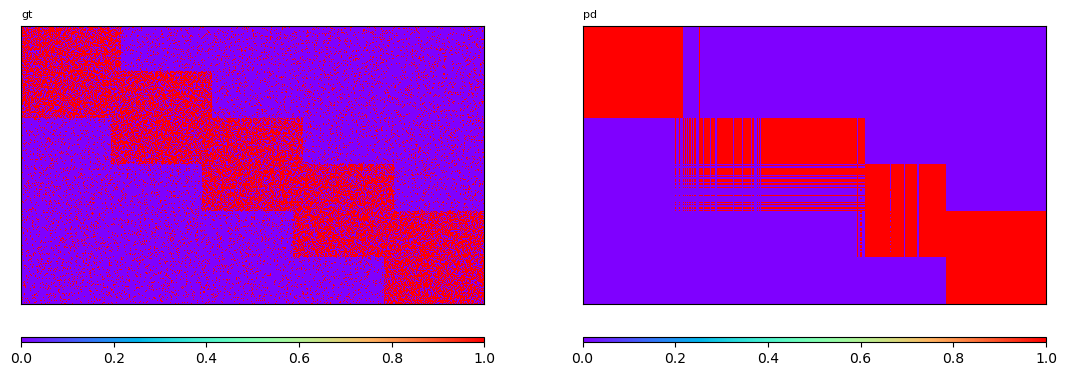

[I] model saved as: 24-05-31_03-49-20_BinaryMFThresholdExSigmoid.pickle


<Figure size 640x480 with 0 Axes>

: 

In [12]:
model_bmfts_1 = BinaryMFThresholdExSigmoid(k=k, U=model.U, V=model.V, W=W, u=u, v=v, init_method='custom')
model_bmfts_1.fit(X_train=X_train, X_val=X_val, X_test=X_test, task=task, verbose=False, display=False)